In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, log_loss
from sklearn.cross_validation import train_test_split

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
%matplotlib inline

In [3]:
df = pd.read_csv('techsoup_datakind_details_wide.csv')

/Users/David/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [ ]:
df.info()

In [6]:
df.head() 

,pri_key,org,city,state,postalcode,country,org_type,org_subtype,budget,reg_date,contact,role,role_description,order_num,tax_id_number,landing_page,Medium,transaction_date,vendor,item,category,licenses,revenue,value
0,1,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,475417,63-1242259,NaN,NaN,2010-06-21,3882,45200711,NaN,1,31,765
1,2,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,475417,63-1242259,NaN,NaN,2010-06-21,3882,39959521,NaN,10,80,1990
2,3,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,260764,63-1242259,NaN,NaN,2008-02-06,3892,23664563,NaN,1,5,40
3,4,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,260764,63-1242259,NaN,NaN,2008-02-06,3892,20137400,NaN,1,15,60
4,5,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,409066,63-1242259,NaN,NaN,2009-11-09,3882,39959521,NaN,4,32,796


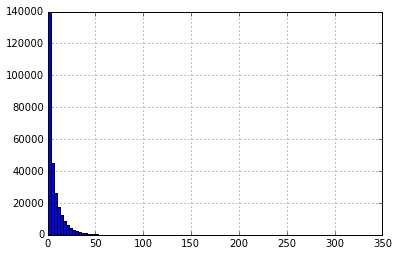

In [9]:
df.org.value_counts().hist(bins = 100)

In [11]:
df.org.value_counts().count()

270495

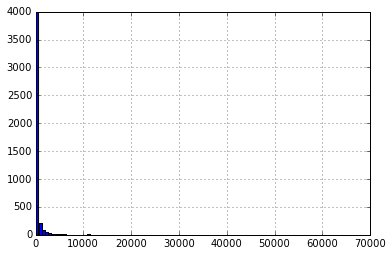

In [13]:
df.item.value_counts().hist(bins = 100)

In [15]:
df.item.value_counts().count()

4471

In [22]:
df.category.isnull().sum()

1488558

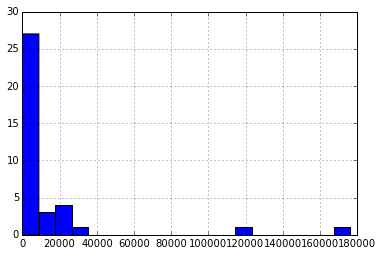

In [24]:
df.category.value_counts().hist(bins = 20)

In [29]:
col_list = df.columns.tolist()

In [44]:
df.transaction_date.order()

233843     2006-01-03
1655922    2006-01-03
1624261    2006-01-03
843747     2006-01-03
1873617    2006-01-03
759482     2006-01-03
1430061    2006-01-03
1631543    2006-01-03
1036667    2006-01-03
1583214    2006-01-03
759483     2006-01-03
502079     2006-01-03
1281503    2006-01-03
1285823    2006-01-03
1887268    2006-01-03
...
1102570    2015-03-27
1311868    2015-03-27
1613911    2015-03-27
350468     2015-03-27
791197     2015-03-27
1093103    2015-03-27
454431     2015-03-27
1659614    2015-03-27
1733697    2015-03-27
1081742    2015-03-27
1081722    2015-03-27
1081721    2015-03-27
716335     2015-03-27
261038     2015-03-27
722911     2015-03-27
Name: transaction_date, Length: 1985591, dtype: object

In [34]:
df.tail()

,pri_key,org,city,state,postalcode,country,org_type,org_subtype,budget,reg_date,contact,role,role_description,order_num,tax_id_number,landing_page,Medium,transaction_date,vendor,item,category,licenses,revenue,value
1985586,1985587,517373,Sofia,BG,1040,BG,3,061,2,2010-07-28 06:55:18.393,NaN,NaN,NaN,491017,000584039,NaN,NaN,2010-07-28,3882,37917492,NaN,3,0,4239
1985587,1985588,512424,Rockville,MD,20854,US,2,035,5000,2010-07-07 11:06:24.593,NaN,NaN,NaN,503328,52-6070720,NaN,NaN,2010-09-07,3882,11951336,graphic-design,3,36,870
1985588,1985589,512424,Rockville,MD,20854,US,2,035,5000,2010-07-07 11:06:24.593,NaN,NaN,NaN,503328,52-6070720,NaN,NaN,2010-09-07,3882,11951338,desktop-publishing,3,24,621
1985589,1985590,885937,Braunschweig,--,38116,DE,2,034,10254,2014-04-28 04:07:31.637,NaN,NaN,NaN,1302456,14/208/01993,NaN,NaN,2015-01-22,4223,72294358,NaN,1,45,449
1985590,1985591,884079,Rastatt,--,76437,DE,1,001,508598,2014-04-22 08:22:04.283,NaN,NaN,NaN,1222201,77777k-25900300401000030,NaN,NaN,2014-09-09,3882,74316333,NaN,1,32,803


In [4]:
df_14 = df[df.transaction_date > '2014-01-01 00:00:00.000']
df_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377878 entries, 13 to 1985590
Data columns (total 24 columns):
pri_key             377878 non-null int64
org                 377878 non-null int64
city                377878 non-null object
state               377864 non-null object
postalcode          377878 non-null object
country             377878 non-null object
org_type            377878 non-null float64
org_subtype         377878 non-null object
budget              377868 non-null object
reg_date            377878 non-null object
contact             182461 non-null float64
role                182461 non-null float64
role_description    182461 non-null object
order_num           377878 non-null int64
tax_id_number       377856 non-null object
landing_page        0 non-null float64
Medium              0 non-null float64
transaction_date    377878 non-null object
vendor              377878 non-null int64
item                377878 non-null int64
category            178475 non-null o

In [5]:
apriori = pd.get_dummies(df_14.item)

In [11]:
apriori['org'] = df_14.org

In [14]:
apriori = apriori.set_index('org')

In [16]:
df_test = apriori.groupby(apriori.index).sum()

In [21]:
df_test.sum().order()[::-1]

74316379    23249
74316611    17008
22227645    16649
28124456    13723
28108076    12063
74316175    11122
11951394     8924
69773291     8144
11950912     5990
74316715     5436
39959697     5044
45200711     4996
44962827     4959
11951539     4734
39959613     4673
...
37917966     1
37921328     1
24598874     1
55217201     1
37921358     1
37921491     1
37921511     1
77748888     1
39870344     1
55217348     1
77748756     1
50861088     1
66578136     1
102945055    1
71444577     1
Length: 1614, dtype: float64

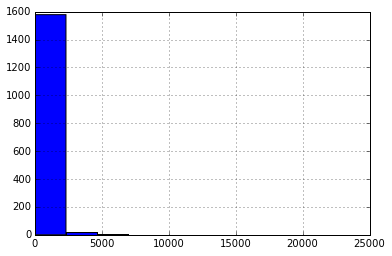

In [23]:
df_test.sum().order()[::-1].hist()

In [24]:
item_counts = df_test.sum().order()[::-1]

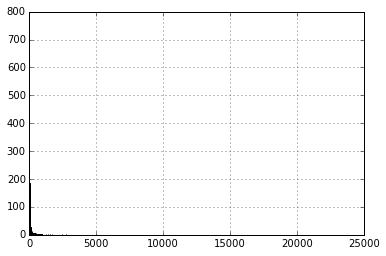

In [26]:
item_counts.hist(bins = len(item_counts))

In [28]:
len(item_counts)

1614

In [31]:
item_counts[item_counts > 100]

74316379    23249
74316611    17008
22227645    16649
28124456    13723
28108076    12063
74316175    11122
11951394     8924
69773291     8144
11950912     5990
74316715     5436
39959697     5044
45200711     4996
44962827     4959
11951539     4734
39959613     4673
...
11951336    108
71589805    107
24767392    107
71450214    107
83151461    107
71355759    106
71445271    106
55217275    105
69772733    105
71445783    103
63683973    102
79298011    102
93231619    101
49722801    101
74316537    101
Length: 349, dtype: float64

In [34]:
c_index = item_counts.index

In [37]:
df_test2 = df_test.ix[:,c_index] 

In [38]:
df_test2.head()

,74316379,74316611,22227645,28124456,28108076,74316175,11951394,69773291,11950912,74316715,39959697,45200711,44962827,11951539,39959613,40198752,71450345,45200669,77473610,74316333,18235854,34793482,69772743,18774275,40198737,...,37916803,37916946,37916964,37917081,37917389,37917578,37917626,37917704,25658549,37917908,37917966,37921328,24598874,55217201,37921358,37921491,37921511,77748888,39870344,55217348,77748756,50861088,66578136,102945055,71444577
org,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88897,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88899,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88900,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88901,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
c = df_test2[df_test2[74316379] > 0]

In [45]:
c.sum()[1:]

74316611    2809
22227645    4479
28124456    2755
28108076    2597
74316175       0
11951394    2005
69773291    2534
11950912    1143
74316715       0
39959697    1316
45200711     918
44962827    1208
11951539    1609
39959613    1526
40198752    1225
...
37917966     0
37921328     0
24598874     0
55217201     0
37921358     0
37921491     0
37921511     0
77748888     0
39870344     0
55217348     0
77748756     0
50861088     0
66578136     0
102945055    0
71444577     0
Length: 1613, dtype: float64

In [53]:
df_14.item.value_counts().count()

1614

In [54]:
df_14.item.value_counts() > 1

74316379    True
74316611    True
22227645    True
28124456    True
28108076    True
74316175    True
11951394    True
69773291    True
11950912    True
74316715    True
39959697    True
45200711    True
44962827    True
11951539    True
39959613    True
...
71444795    False
74205684    False
37921511    False
37681138    False
50860414    False
47231139    False
77750777    False
27965742    False
68333432    False
71445747    False
48029874    False
54313910    False
63683712    False
94323792    False
71444091    False
Length: 1614, dtype: bool

In [55]:
1 + 3

4

In [ ]:
pd.get_dummies(df.order_num)

In [58]:
df[['org', 'order_num']]

,org,order_num
0,105872,475417
1,105872,475417
2,105872,260764
3,105872,260764
4,105872,409066
5,105872,234017
6,105872,234017
7,105872,234017
8,105872,160663
9,105872,990895
